# Heart Disease UCI

Context
<br>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Reference:
1. https://www.kaggle.com/kralmachine/analyzing-the-heart-disease

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age
<br>sex
<br>chest pain type (4 values)
<br>resting blood pressure
<br>serum cholestoral in mg/dl
<br>fasting blood sugar > 120 mg/dl
<br>resting electrocardiographic results (values 0,1,2)
<br>maximum heart rate achieved
<br>exercise induced angina
<br>oldpeak = ST depression induced by exercise relative to rest
<br>the slope of the peak exercise ST segment
<br>number of major vessels (0-3) colored by flourosopy
<br>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [25]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

## Exploratory Data Analysis

In [26]:
data.shape

(303, 14)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   Cp        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   Fbs       303 non-null    int64  
 6   Restecg   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  Ca        303 non-null    int64  
 12  Thal      303 non-null    int64  
 13  Target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [29]:
data.nunique()

Age          41
Sex           2
Cp            4
Trestbps     49
Chol        152
Fbs           2
Restecg       3
Thalach      91
Exang         2
Oldpeak      40
Slope         3
Ca            5
Thal          4
Target        2
dtype: int64

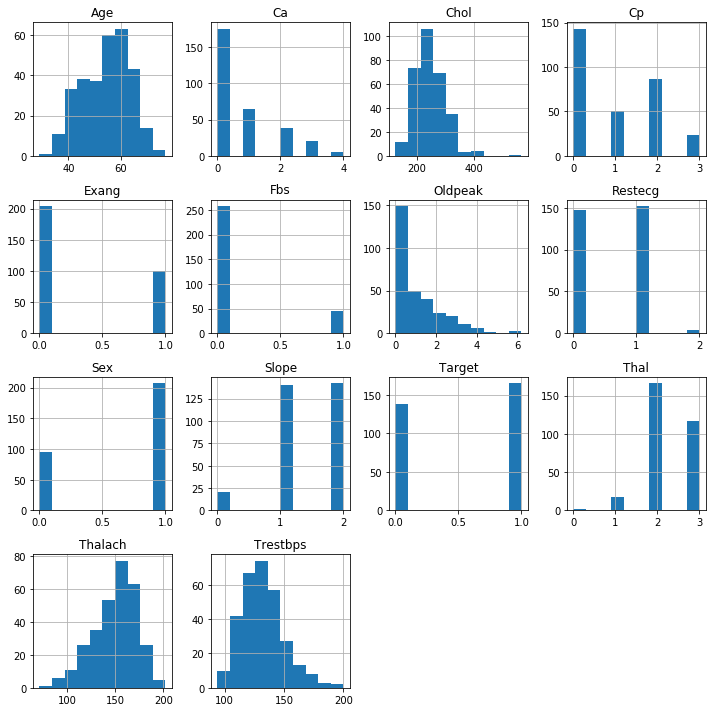

In [31]:
data.hist(figsize = (10, 10))
plt.tight_layout()
plt.show()

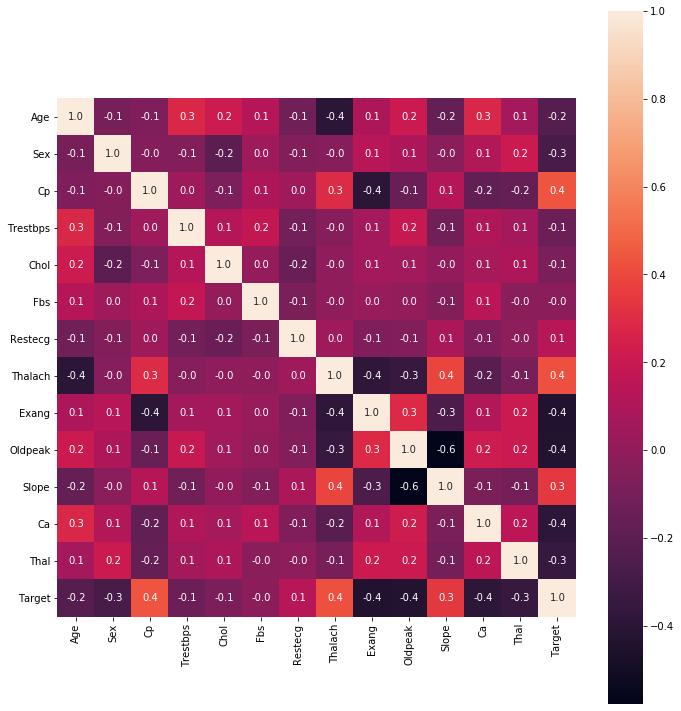

In [32]:
fig = plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), square = True, annot = True, fmt = ".1f")
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

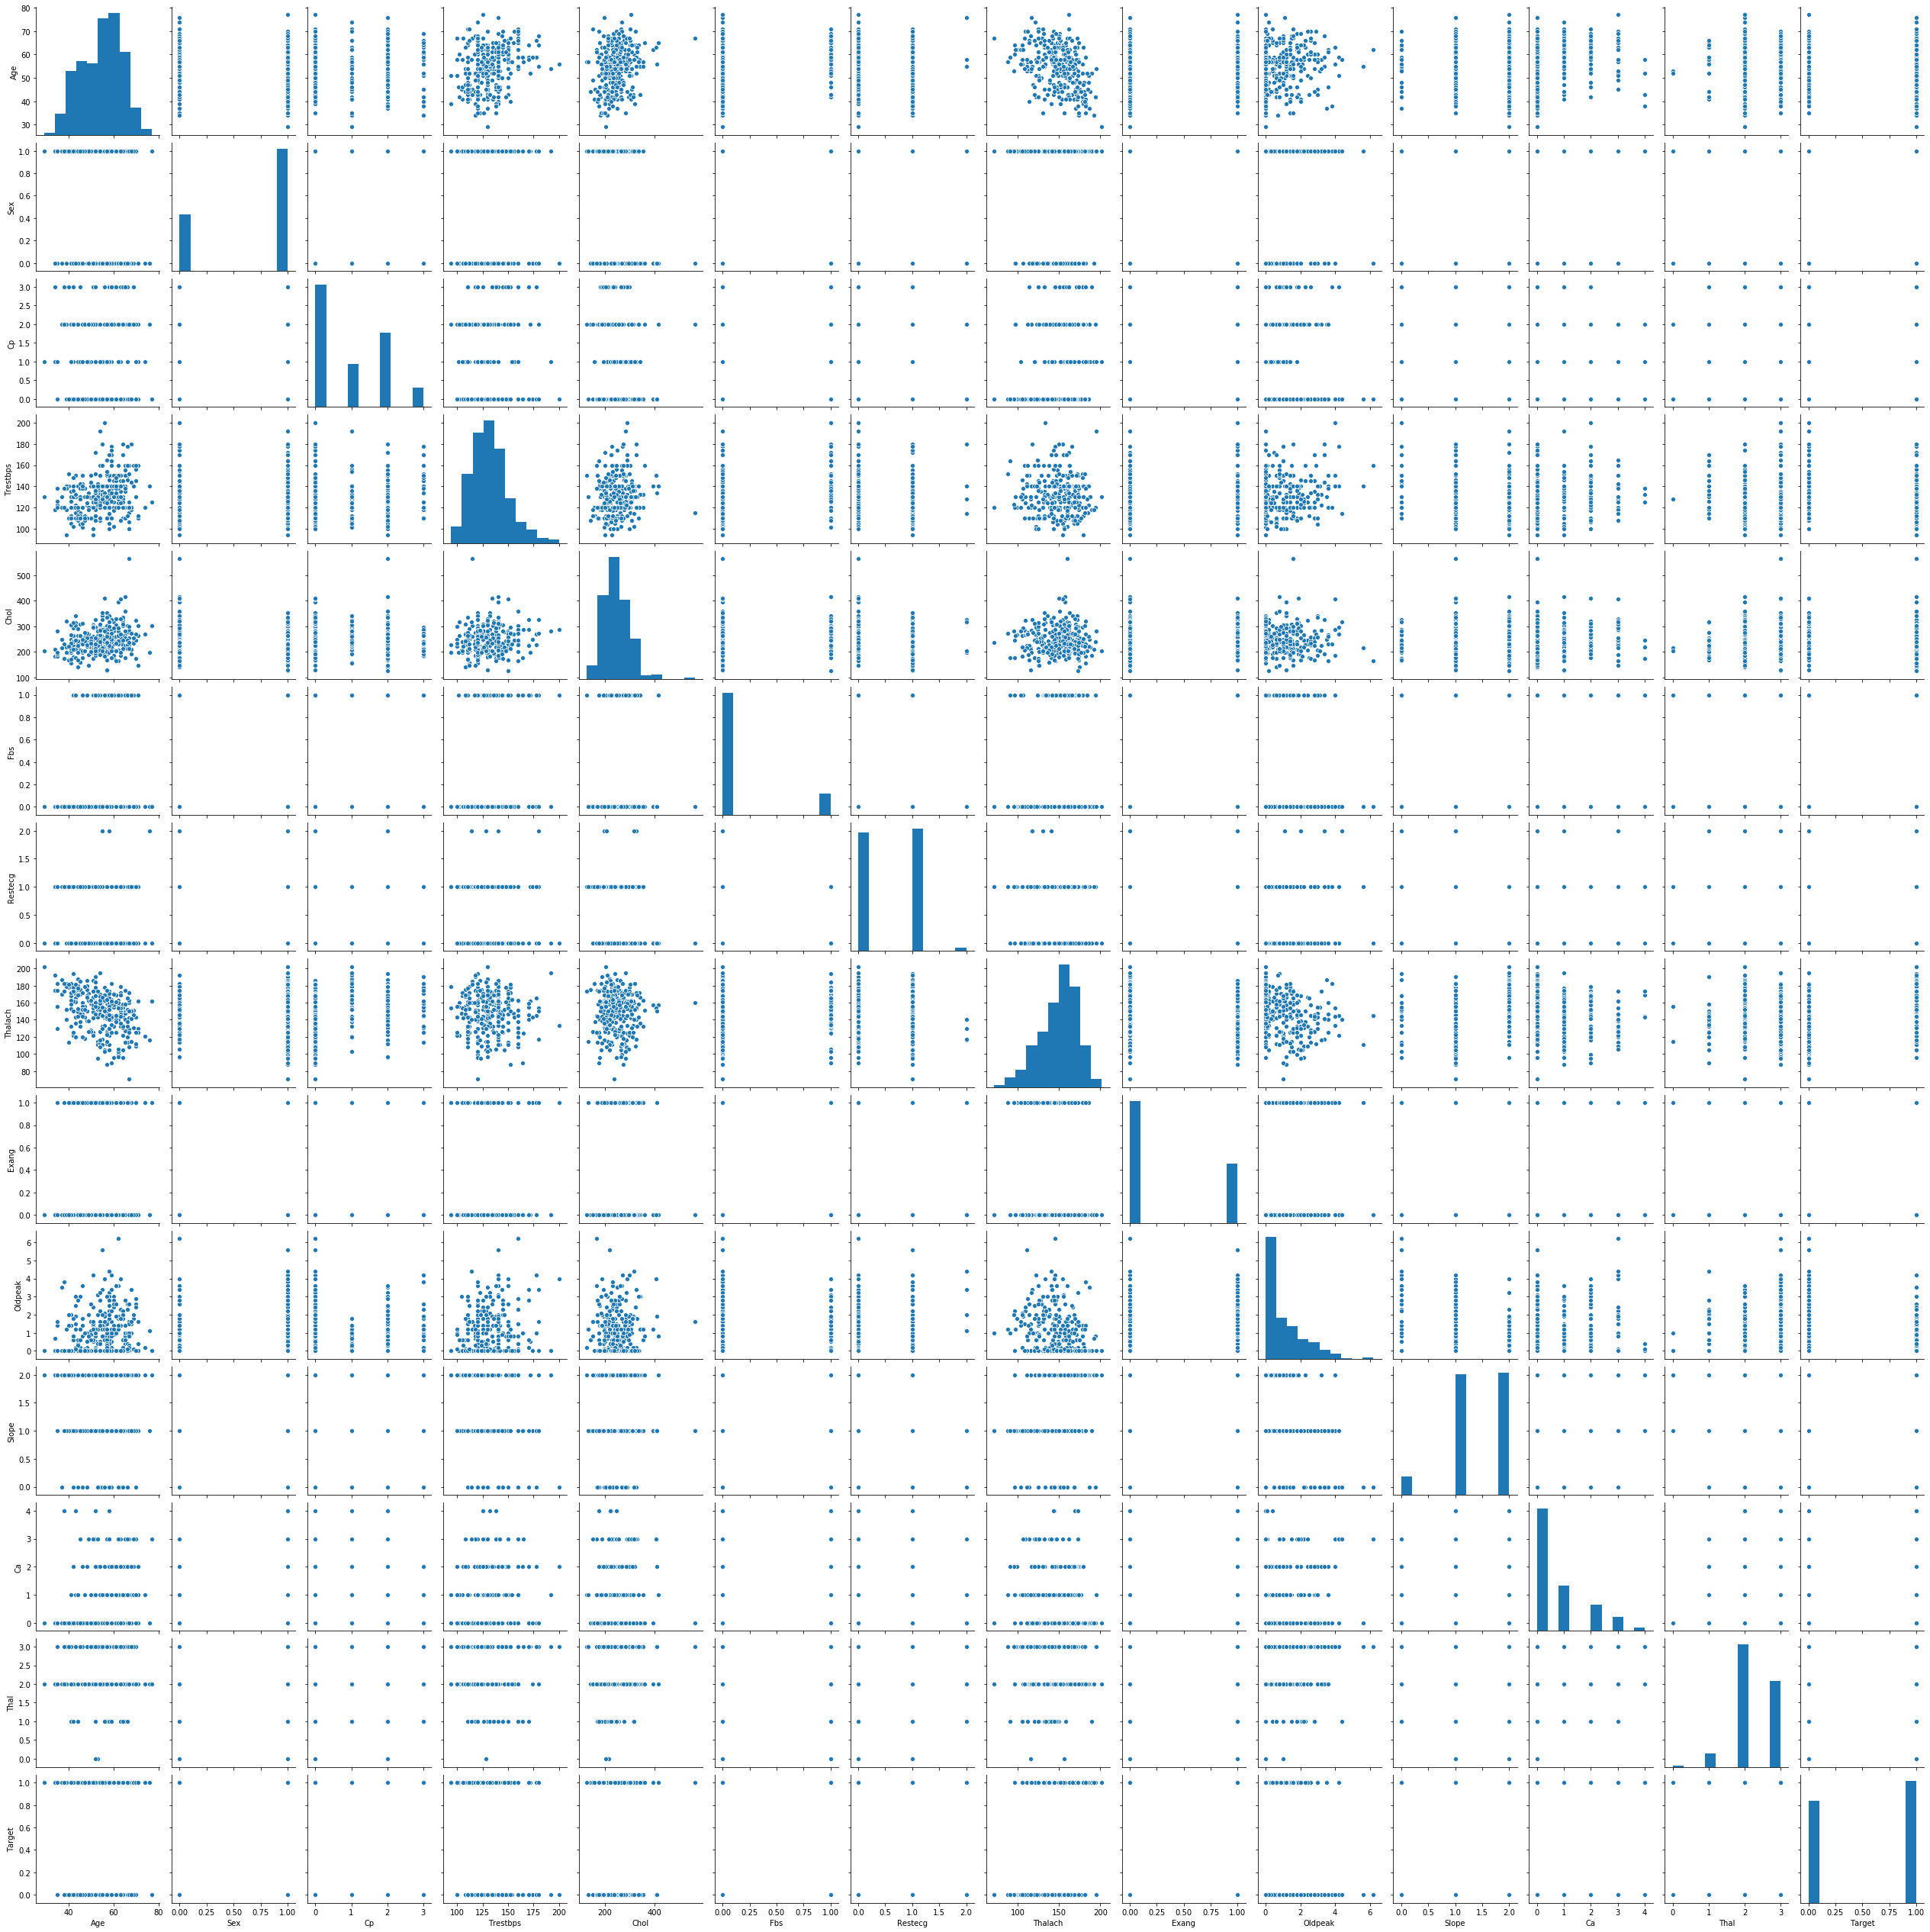

In [33]:
fig = plt.figure(figsize = (10, 10))
sns.pairplot(data)
plt.show()

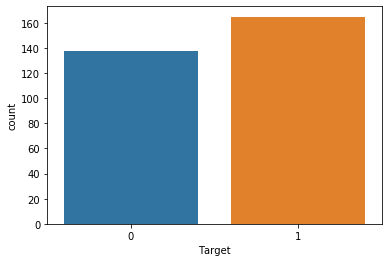

In [44]:
sns.countplot(x = "Target", data = data)
plt.show()

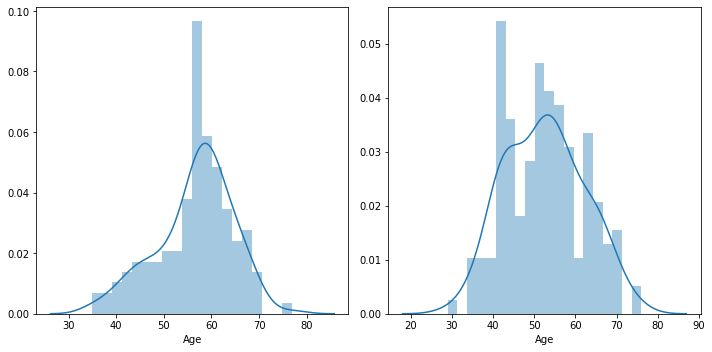

In [48]:
# Age Analysis
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.distplot(data[data["Target"] == 0]["Age"], ax= ax[0], bins = 20, norm_hist = True)
sns.distplot(data[data["Target"] == 1]["Age"], ax= ax[1], bins = 20, norm_hist = True)
plt.tight_layout()
plt.show()

In [50]:
data["Status"] = pd.cut(data["Age"], bins = 3, labels = ["Young", "Middle", "Elder"])
data

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,Status
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elder
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Young
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Young
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Middle
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Young
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Elder
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Middle


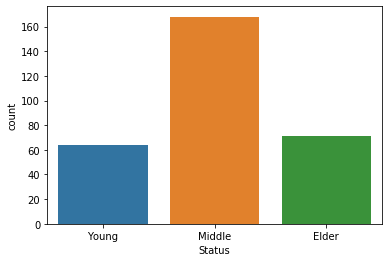

In [51]:
sns.countplot(x = "Status", data = data)
plt.show()

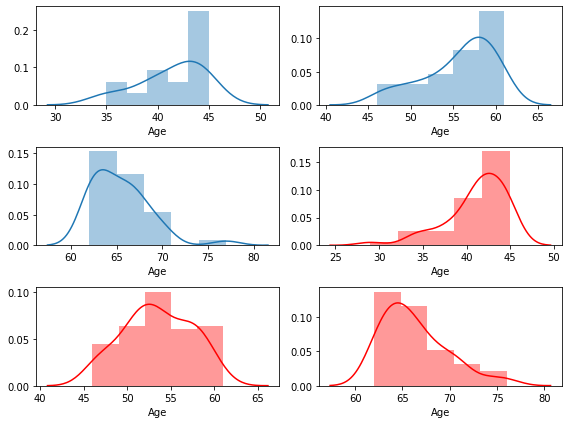

In [72]:
fig, ax = plt.subplots(3, 2, figsize = (8, 6))
sns.distplot(data[(data["Target"] == 0) & (data["Status"] == "Young")]["Age"], ax= ax[0,0], bins = 5, norm_hist = True)
sns.distplot(data[(data["Target"] == 0) & (data["Status"] == "Middle")]["Age"], ax= ax[0,1], bins = 5, norm_hist = True)
sns.distplot(data[(data["Target"] == 0) & (data["Status"] == "Elder")]["Age"], ax= ax[1,0], bins = 5, norm_hist = True)
sns.distplot(data[(data["Target"] == 1) & (data["Status"] == "Young")]["Age"], ax= ax[1,1], bins = 5, norm_hist = True, color = "red")
sns.distplot(data[(data["Target"] == 1) & (data["Status"] == "Middle")]["Age"], ax= ax[2,0], bins = 5, norm_hist = True, color = "red")
sns.distplot(data[(data["Target"] == 1) & (data["Status"] == "Elder")]["Age"], ax= ax[2,1], bins = 5, norm_hist = True, color = "red")
plt.tight_layout()
plt.show()